# Generate Masks

## Imports

In [1]:
from keras.optimizers import Adam
from keras.layers.advanced_activations import PReLU
import numpy as np
import matplotlib.pyplot as plt
from optimizers.AdamAccumulate import AdamAccumulate
from models.u_net import UNet
from models.u_net_heng import UNet_Heng
from models.tiramisu import Tiramisu
from models.u_net_heng_aux import UNet_Heng_Aux
from utilities.submit import generate_submit
from utilities.submit_ensemble import generate_submit_ensemble
from utilities.submit_ensemble import ModelInfo
from utilities import utils_masks as utils

%load_ext autoreload
%autoreload 2
%matplotlib inline

Using TensorFlow backend.


## Create & Load Models

In [2]:
models_info = []

#model0 = UNet((1024, 1024, 3), filters=10, depth=4, activation=lambda x: PReLU()(x))
#model0.compile(Adam(), loss='binary_crossentropy')
#model0.load_weights('weights/unet-2017-09-01-1355.hdf5')
#models_info.append(ModelInfo(lambda batch: model0.predict_on_batch(batch), 1024, True, 1))

#model1 = UNet((1024, 1024, 3), filters=8, depth=7, activation=lambda x: PReLU()(x))
#model1.compile(Adam(), loss='binary_crossentropy')
#model1.load_weights('weights/unet-2017-09-02-1809.hdf5')
#models_info.append(ModelInfo(lambda batch: model1.predict_on_batch(batch), 1024, False, 1))

#model2 = UNet((1024, 1024, 3), filters=8, depth=7, activation=lambda x: PReLU()(x))
#model2.compile(Adam(), loss='binary_crossentropy')
#model2.load_weights('weights/unet-2017-09-03-1739.hdf5')
#models_info.append(ModelInfo(lambda batch: model2.predict_on_batch(batch), 1024, True, 1))

auxiliaries = [False, False, False, False, True, True]
model = UNet_Heng_Aux((1024, 1024, 3), auxiliaries=auxiliaries)
model.compile(optimizer=Adam(), loss='binary_crossentropy')
model.load_weights('weights/unet-heng-aux-2017-09-25-1603.hdf5')
models_info= [ModelInfo(lambda ids, batch: model.predict_on_batch(batch), 1024, True, 1)]

## Load BBoxes

In [3]:
bbox_file_path = 'inputs/test_bbox.csv'
bboxes = utils.get_bboxes(bbox_file_path)

## Generate Submit

In [6]:
batch_size = 10
threshold = 0.5
augmentations = 0
submit_name = 'submit-2017-09-25-2313'
test_path = 'inputs/test_hq_01_07/'
test_masks_path = 'outputs/test_hq_masks_01_07/'

generate_submit_ensemble(models_info, batch_size, threshold, test_path, 'outputs/',
                         submit_name, augmentations, test_masks_path, bboxes, q_size=30)

  0%|          | 0/10007 [00:00<?, ?it/s]

Predicting on 100064 samples with batch_size = 10...


100%|██████████| 10007/10007 [5:03:05<00:00,  1.92s/it] 


Generating submission file...
Done


### Visualization

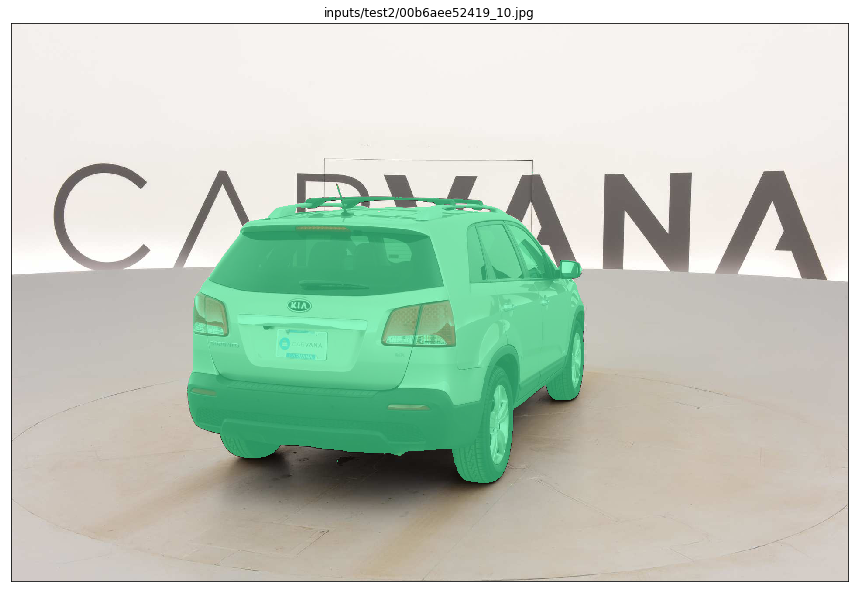

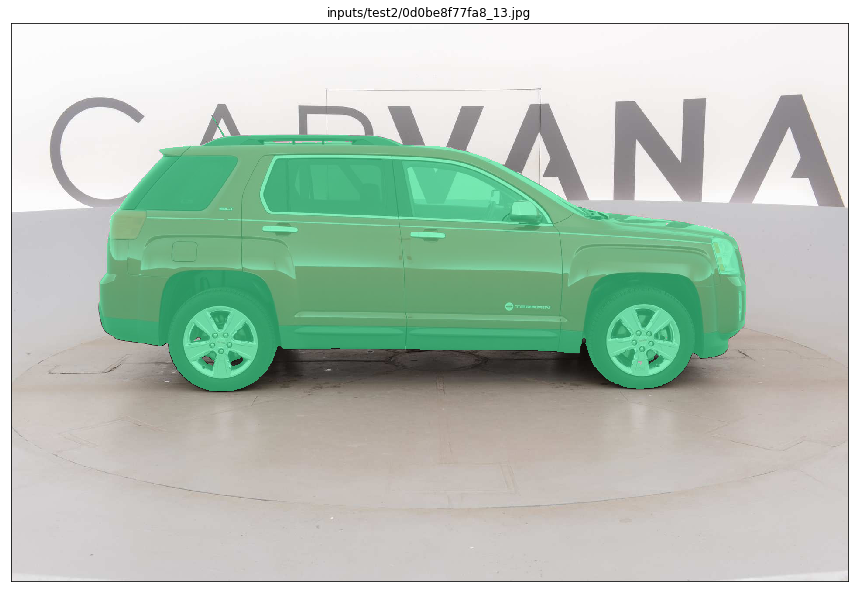

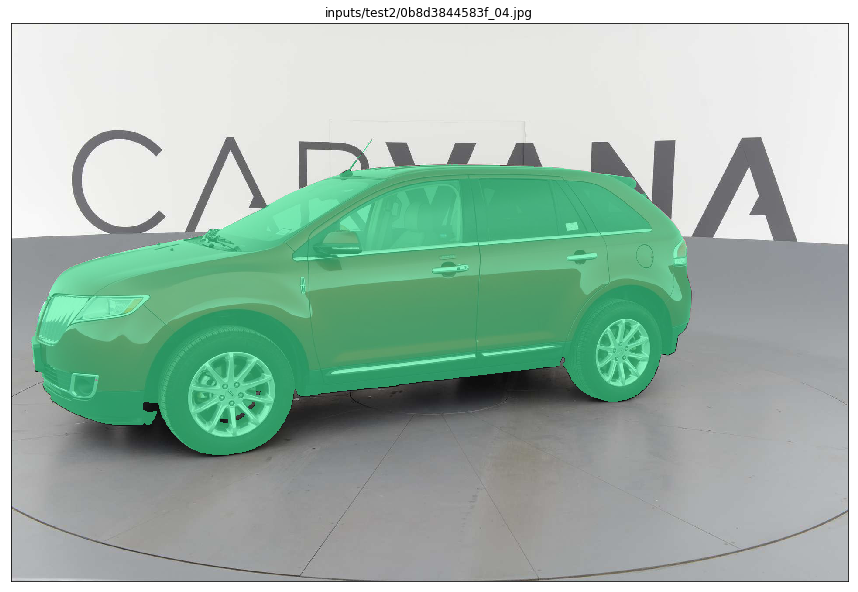

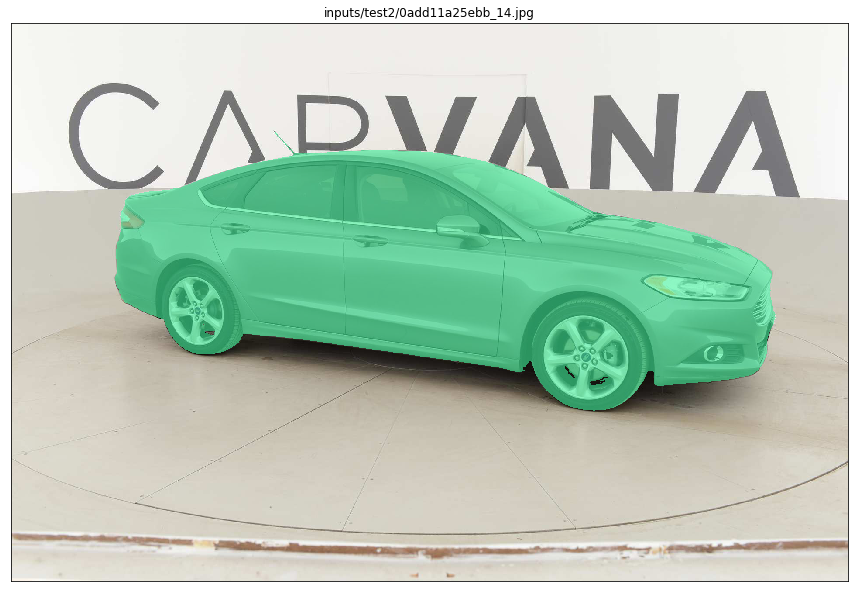

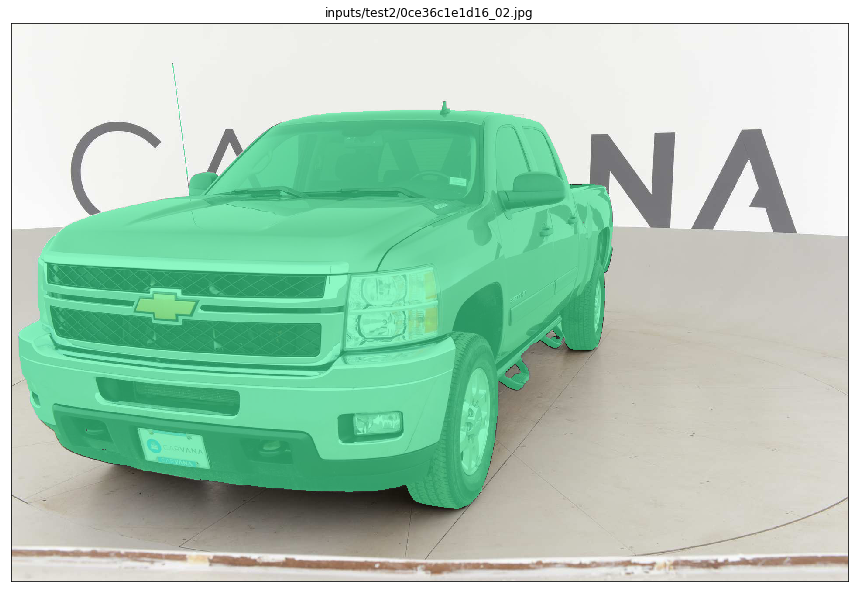

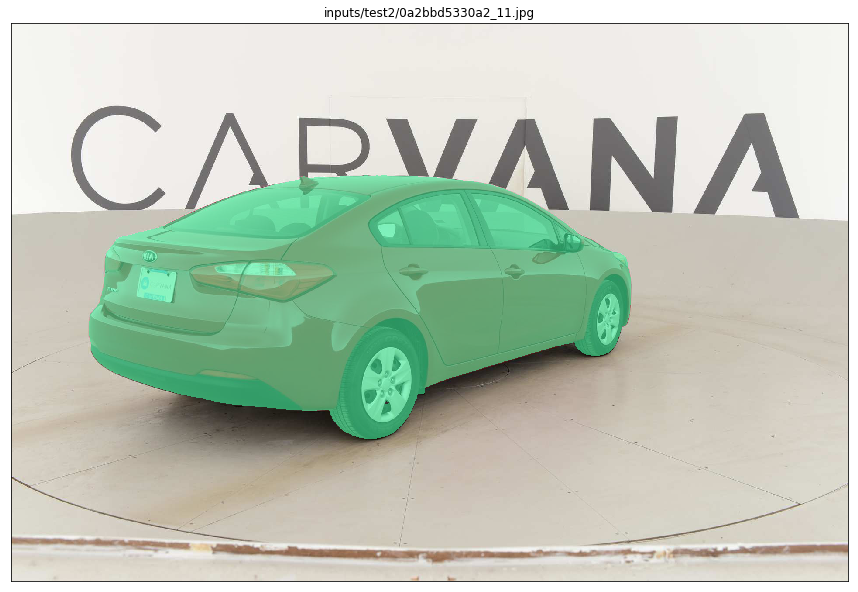

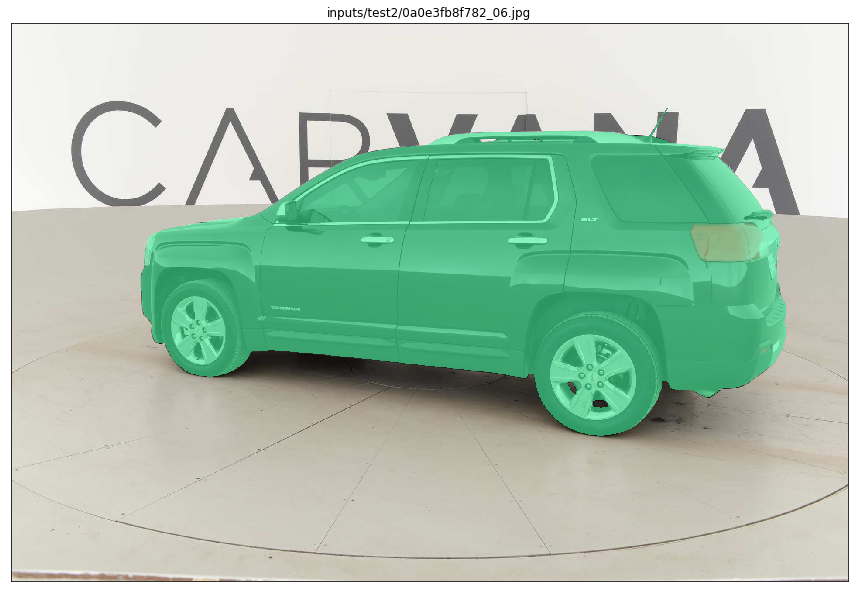

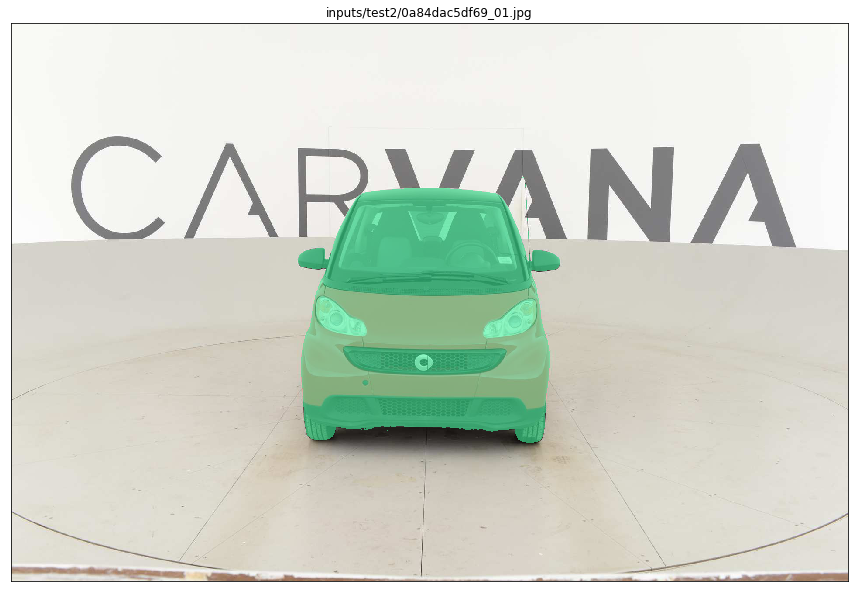

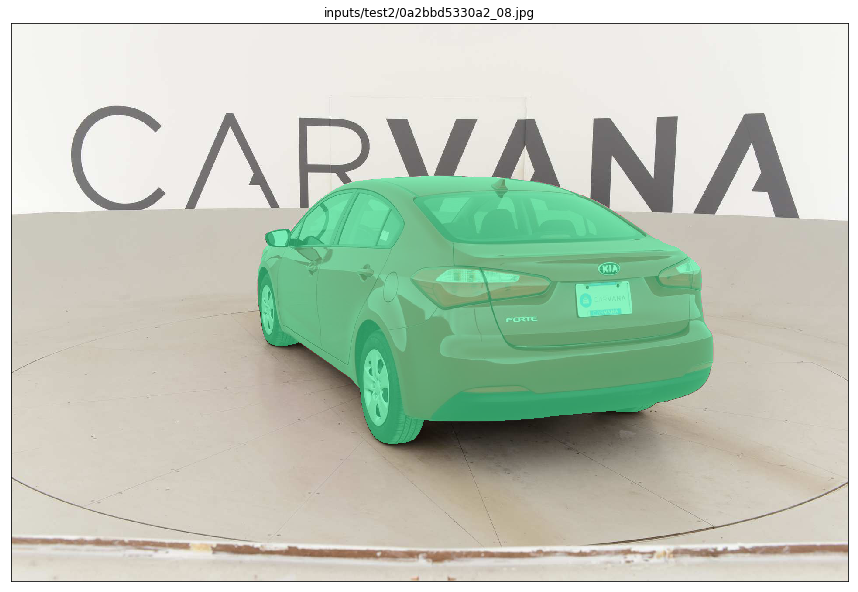

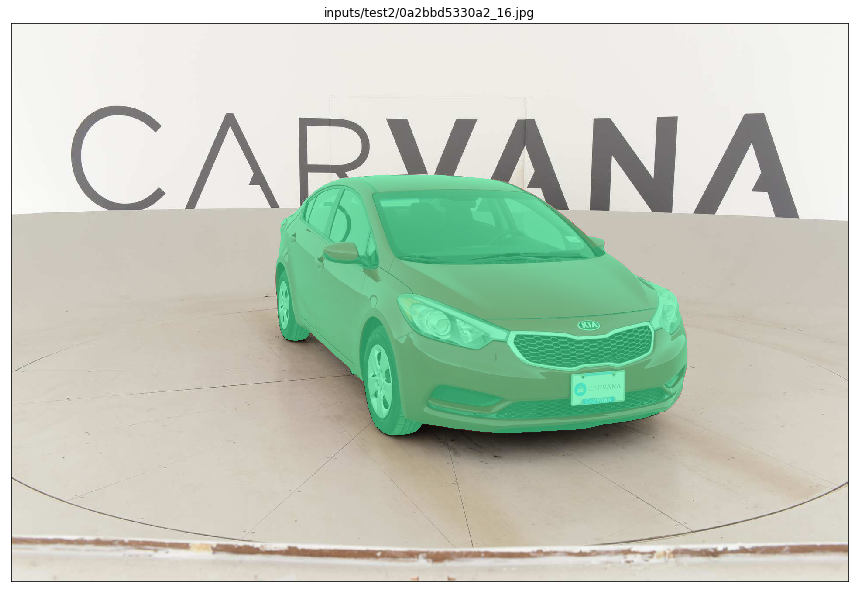

In [5]:
utils.show_test_masks(test_path, test_masks_path, 10)